<span style="font-size: 32px; font-weight:bold">Image Classification</span>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import math
import numpy as np
import pandas as pd

<span style="font-size: 25px; font-weight:bold">Data Preprocessing</span>

In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
Y_train=Y_train.reshape(-1,)
Y_test=Y_test.reshape(-1,)
Y_train.shape,set(Y_train)

((50000,), {0, 1, 2, 3, 4, 5, 6, 7, 8, 9})

In [ ]:
# Normalizing the Data
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
class_mapping = dict(zip(range(len(class_names)), class_names))

In [ ]:
# function to display a grid of images
def display_images(images, labels, class_names):
    num_rows =1
    num_cols =images.shape[0]
    fig, axes = plt.subplots(num_rows,num_cols, figsize=(40, 20))
    index =0
    for j in range(num_cols):
        axes[j].imshow(images[index])
        axes[j].set_title(class_names[labels[index]])
        axes[j].axis("off")  
        index =index+1
    plt.show()

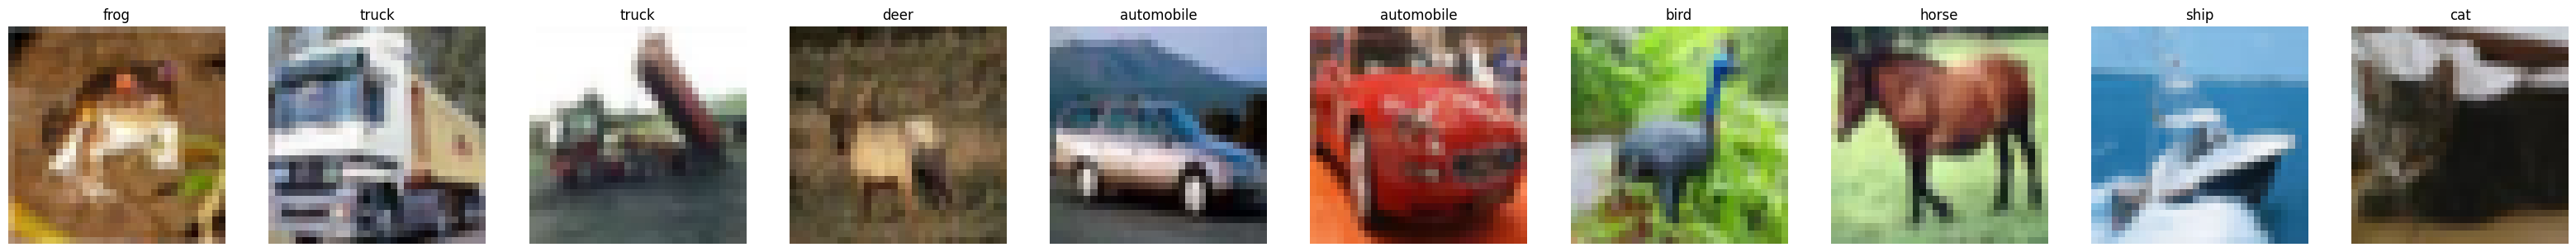

In [ ]:
display_images(X_train[:10], Y_train[:10], class_names)

<span style="font-size: 25px; font-weight:bold">Classification Using Artificial Neural Network</span>

In [ ]:
# creating a sequential neural network
ann_model = models.Sequential()

ann_model.add(layers.Flatten(input_shape=(32,32,3)))
ann_model.add(layers.Dense(3000, activation='relu'))
ann_model.add(layers.Dense(1000, activation='relu'))
ann_model.add(layers.Dense(10, activation='softmax'))
ann_model.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann_model.fit(X_train, Y_train, epochs=5)

In [ ]:
ann_model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.4649 - accuracy: 0.4809


[1.4649416208267212, 0.48089998960494995]

<span style="font-size: 20px; font-weight:light">The performance of the ANN models in image classification tasks tends to be suboptimal, often falling short of achieving high accuracy and robust feature extraction.</span>

<span style="font-size: 25px; font-weight:bold">Classification Using Convolutional Neural Network</span>

In [ ]:
cnn_model = models.Sequential()
# Convolutional Layer
cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Dense Layer
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(60, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="data/", histogram_freq=1)

In [ ]:
cnn_model.fit(X_train, Y_train, epochs=10,callbacks=[tb_callback])

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4584 - accuracy: 0.4750
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1124 - accuracy: 0.6091
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9902 - accuracy: 0.6546
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8985 - accuracy: 0.6892
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8375 - accuracy: 0.7096
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7835 - accuracy: 0.7286
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7339 - accuracy: 0.7453
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6896 - accuracy: 0.7595
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6497 - accuracy: 0.7759
Epoch 10/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0

In [ ]:
cnn_model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9211 - accuracy: 0.7027


[0.9211075305938721, 0.7027000188827515]

In [ ]:
Y_pred = cnn_model.predict(X_test)
Y_classes = [np.argmax(element) for element in Y_pred]

313/313 [==============================] - 1s 2ms/step


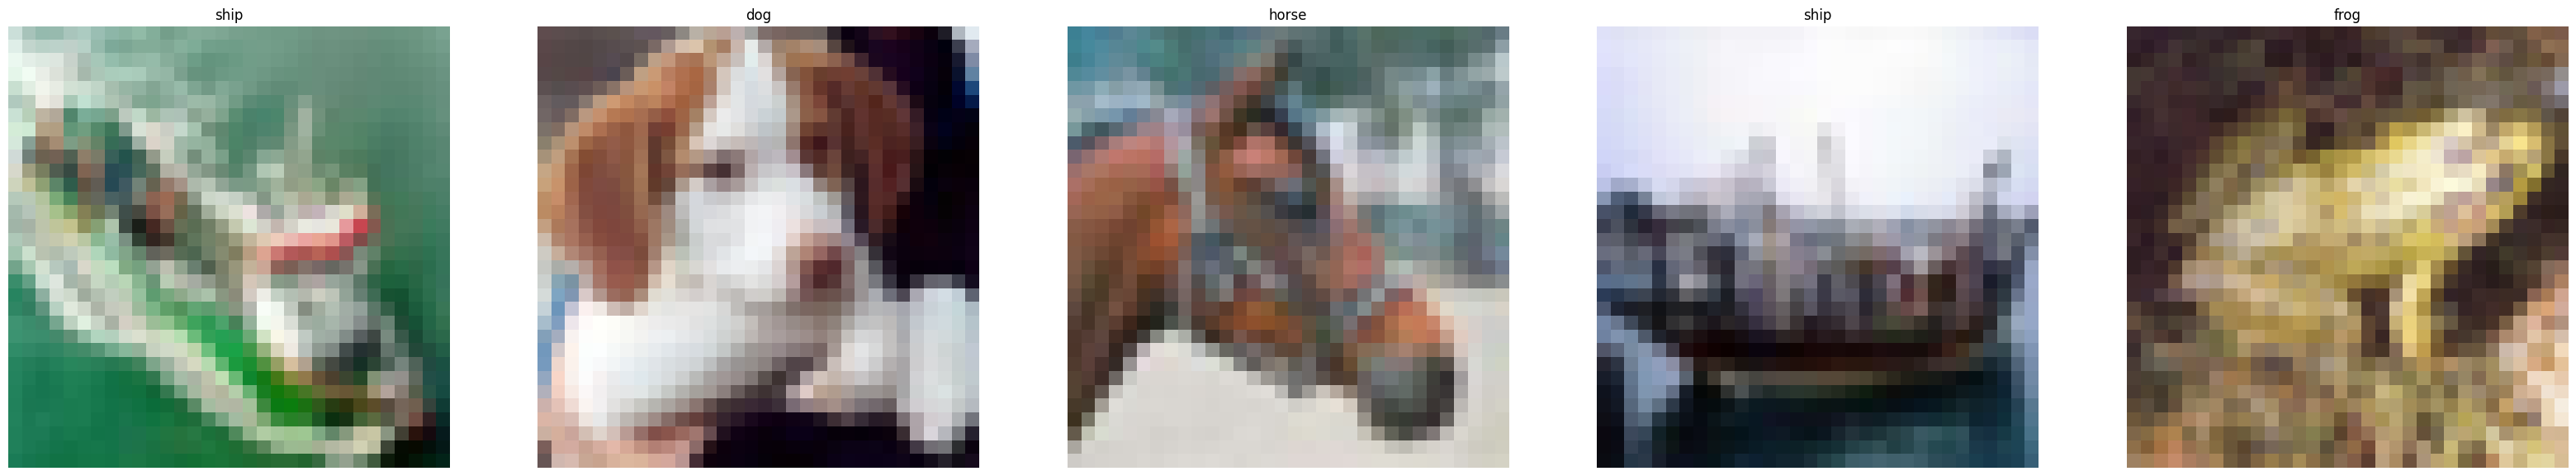

In [ ]:
display_images(X_test[15:20], Y_classes[15:20], class_names)

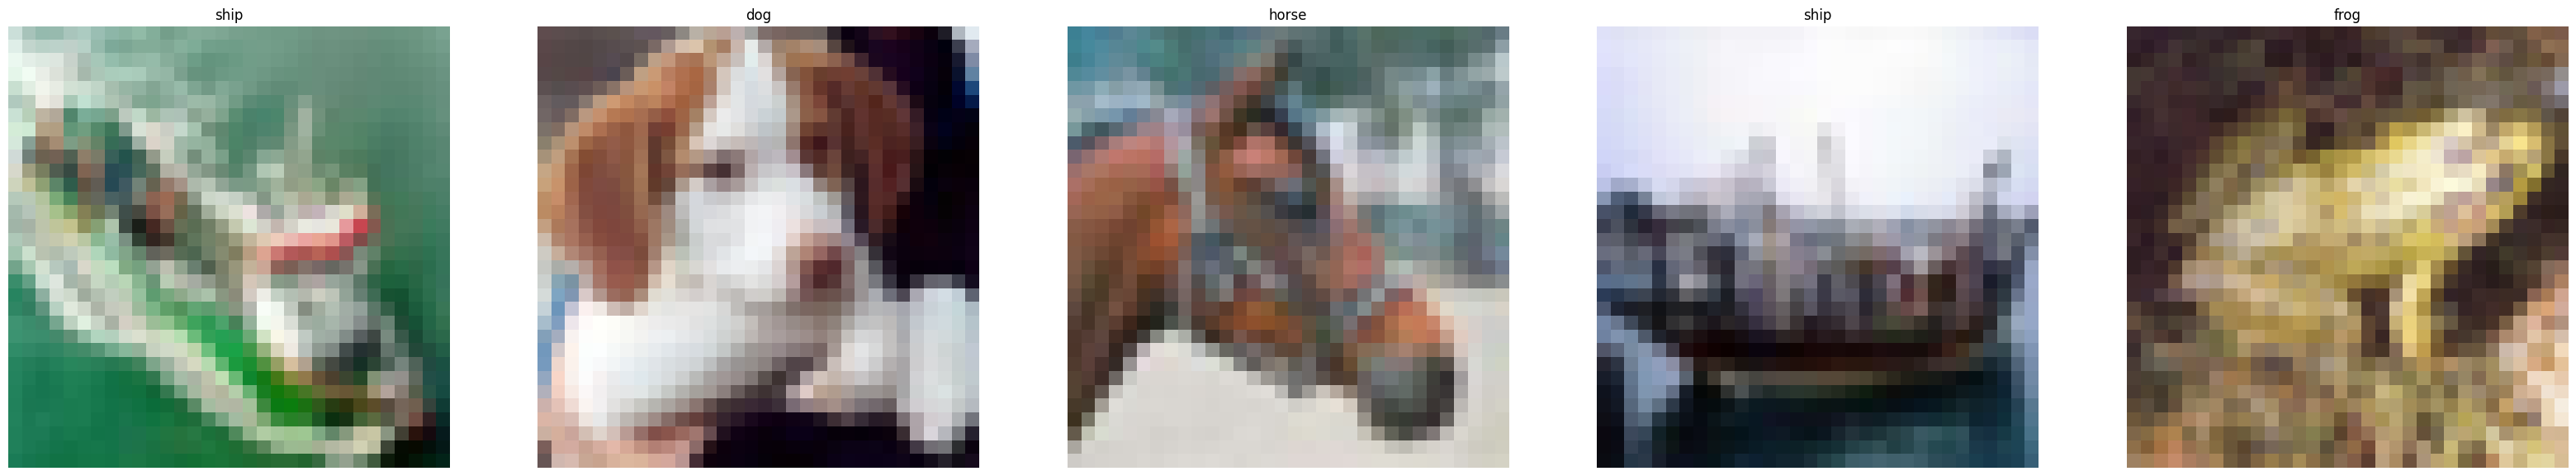

In [ ]:
display_images(X_test[15:20], Y_test[15:20], class_names)

In [ ]:
Y_names = [class_mapping[class_index] for class_index in Y_classes]

In [ ]:
df = pd.DataFrame(Y_names)
df.to_csv('data/predicted_values.csv', index=False)